# Modelo de Machine Learning

## Instalação PyCaret

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

##Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_predict,cross_val_score,cross_validate,StratifiedKFold
from sklearn.metrics import confusion_matrix,roc_auc_score,make_scorer
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
import pycaret
pycaret.__version__

'3.3.2'

In [4]:
from pycaret.classification import *

## Dataset

In [5]:
df = pd.read_csv('/content/churndata_mod.csv')

In [6]:
df.head()

,score_credito,pais,genero,idade,tempo,saldo,num_produtos,tem_cartao,membro_ativo,salario_estimado,saiu
0,619,França,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
masc_fem = {'Female':'Feminino',
            'Male':'Masculino'}

In [8]:
df['genero'] = df['genero'].replace(masc_fem)

In [ ]:
df.head()

,score_credito,pais,genero,idade,tempo,saldo,num_produtos,tem_cartao,membro_ativo,salario_estimado,saiu
0,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0


## Setup PyCaret

In [9]:
s = setup(df,
          target = 'saiu',
          train_size=0.7,
          categorical_features=['genero','pais'],
          imputation_type=None,
          max_encoding_ohe=25,
          session_id = 123,
          bin_numeric_features = ['idade','score_credito','salario_estimado','saldo'],
          )

,Description,Value
0,Session id,123
1,Target,saiu
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(7000, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


Ao delimitar as variáveis categóricas, o pipeline fará OneHotEncoding das variáveis. Além disso, são criadas categorias para as variáveis numéricas. O tamanho do teste será de 3000 entradas.

In [10]:
s.X_train_transformed.head()

,score_credito,pais_Espanha,pais_França,pais_Alemanha,genero,idade,tempo,saldo,num_produtos,tem_cartao,membro_ativo,salario_estimado
5209,3.0,1.0,0.0,0.0,0.0,1.0,2,0.0,1,1,1,4.0
1739,3.0,0.0,1.0,0.0,1.0,0.0,7,3.0,2,1,0,1.0
7608,3.0,1.0,0.0,0.0,0.0,0.0,5,0.0,2,0,1,0.0
1417,2.0,0.0,0.0,1.0,0.0,0.0,2,2.0,2,0,1,3.0
9443,1.0,0.0,0.0,1.0,1.0,3.0,1,2.0,1,1,1,3.0


## Importando e aplicando métricas relevantes

In [11]:
from sklearn.metrics import balanced_accuracy_score, average_precision_score
from imblearn.metrics import geometric_mean_score as gmean

In [16]:
remove_metric('Accuracy')
add_metric('balanced accuracy', 'Balanced Accuracy', balanced_accuracy_score)
add_metric('gmean', 'Gmean', gmean)
add_metric('avpr', 'Average precision score', average_precision_score)

Name                                           Average precision score
Display Name                                   Average precision score
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(average_precision_score, response_...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: avpr, dtype: object

Dado que a acurácia não é uma métrica adequada para avaliação de desempenho de dataset desbalanceado, são introduzidas outras métricas mais propícias para estas situações, sendo elas a Acurácia Balanceada, a média geométrica e o score de precisão média.

## Criando e tunando modelo

In [17]:
best_model = compare_models(include=['catboost','lightgbm','xgboost'],sort='Average precision score')


,Model,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Gmean,Average precision score,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8442,0.4699,0.7441,0.5751,0.4954,0.5148,0.7140,0.6706,0.4584,1.0790
catboost,CatBoost Classifier,0.8441,0.4664,0.7255,0.5671,0.4851,0.5025,0.7105,0.6668,0.4477,4.3140
xgboost,Extreme Gradient Boosting,0.8194,0.4805,0.6655,0.5565,0.4650,0.4750,0.7088,0.6703,0.4265,0.2150


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [18]:
lightgbm = create_model('lightgbm')

,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Gmean,Average precision score
Fold,,,,,,,,,
0,0.8493,0.4718,0.7363,0.5751,0.4951,0.5128,0.7144,0.6720,0.4545
1,0.8610,0.4859,0.8023,0.6053,0.5339,0.5579,0.7277,0.6864,0.4941
2,0.8612,0.4789,0.7556,0.5862,0.5089,0.5279,0.7197,0.6782,0.4675
3,0.8773,0.5634,0.7767,0.6531,0.5817,0.5927,0.7611,0.7350,0.5261
4,0.8602,0.4545,0.6915,0.5485,0.4612,0.4759,0.7012,0.6564,0.4257
5,0.8532,0.4336,0.7654,0.5536,0.4762,0.5035,0.6997,0.6471,0.4476
6,0.8282,0.4685,0.8481,0.6036,0.5362,0.5695,0.7235,0.6771,0.5059
7,0.8073,0.4476,0.6400,0.5267,0.4311,0.4412,0.6915,0.6470,0.3993
8,0.8183,0.4476,0.6809,0.5401,0.4511,0.4655,0.6968,0.6507,0.4176


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Dos três modelos selecionados para avaliação, o que teve o melhor desempenho foi o LightGBM. LightGBM é um algoritmo de árvore de decisão que utiliza gradient boosting.

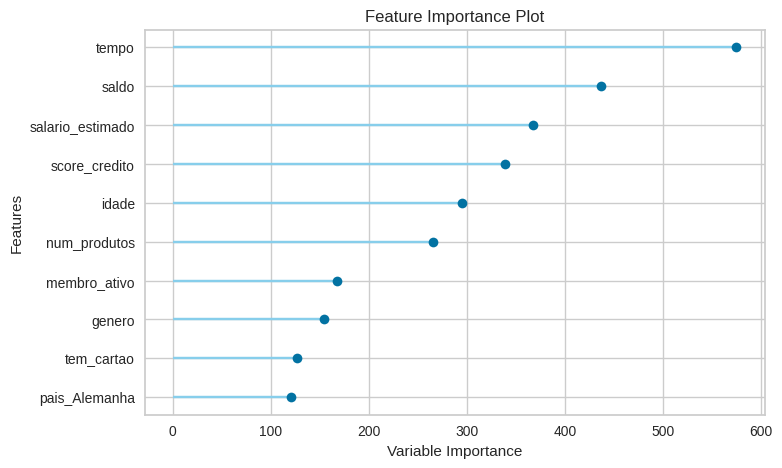

In [19]:
plot_model(lightgbm, plot = 'feature')

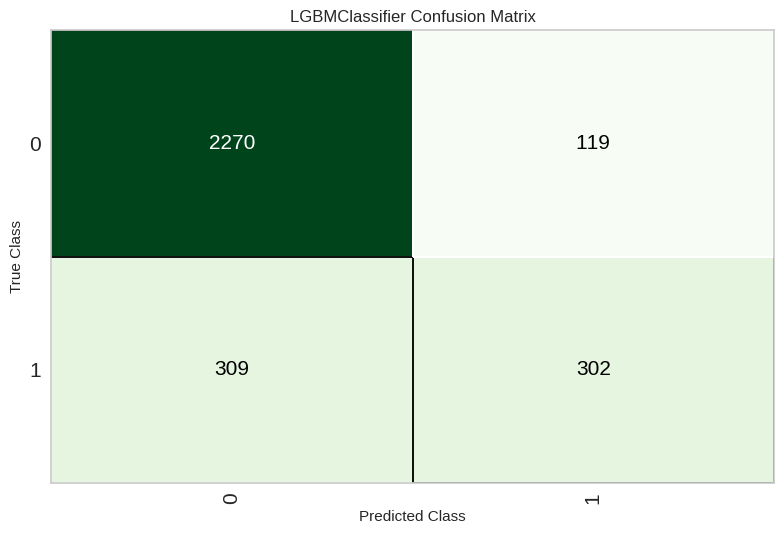

In [ ]:
plot_model(lightgbm, plot = 'confusion_matrix')

Como nosso objetivo é prever com melhor qualidade aqueles que tendem a sair, precisamos aumentar o Recall. Para isso faremos a tunagem dos hiperparâmetros.

In [20]:
tuned_lightgbm = tune_model(lightgbm,
                            custom_grid = {
                                'learning_rate': [0.01, 0.1],
                                'n_estimators': [100, 200, 300],
                                'max_depth': [10, 20, 30],
                                'subsample': [0.6, 0.8, 1.0],
                                'colsample_bytree': [0.6, 0.8, 1.0],
                                'reg_alpha': [0.0, 0.1, 1.0],
                                'reg_lambda': [0.0, 0.1, 1.0]
                            },
                            optimize='Recall')

,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Gmean,Average precision score
Fold,,,,,,,,,
0,0.8405,0.4930,0.7143,0.5833,0.5006,0.5131,0.7214,0.6843,0.4550
1,0.8477,0.4718,0.7528,0.5801,0.5023,0.5220,0.7162,0.6732,0.4623
2,0.8532,0.5070,0.7347,0.6000,0.5206,0.5336,0.7302,0.6953,0.4725
3,0.8725,0.5704,0.7570,0.6506,0.5768,0.5854,0.7619,0.7375,0.5190
4,0.8478,0.4895,0.6667,0.5645,0.4734,0.4818,0.7133,0.6773,0.4306
5,0.8404,0.4615,0.7333,0.5665,0.4853,0.5040,0.7092,0.6646,0.4485
6,0.8252,0.4406,0.8077,0.5701,0.4977,0.5300,0.7068,0.6547,0.4701
7,0.7991,0.4545,0.6311,0.5285,0.4311,0.4397,0.6932,0.6508,0.3983
8,0.8119,0.4266,0.6854,0.5259,0.4377,0.4554,0.6882,0.6365,0.4095


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


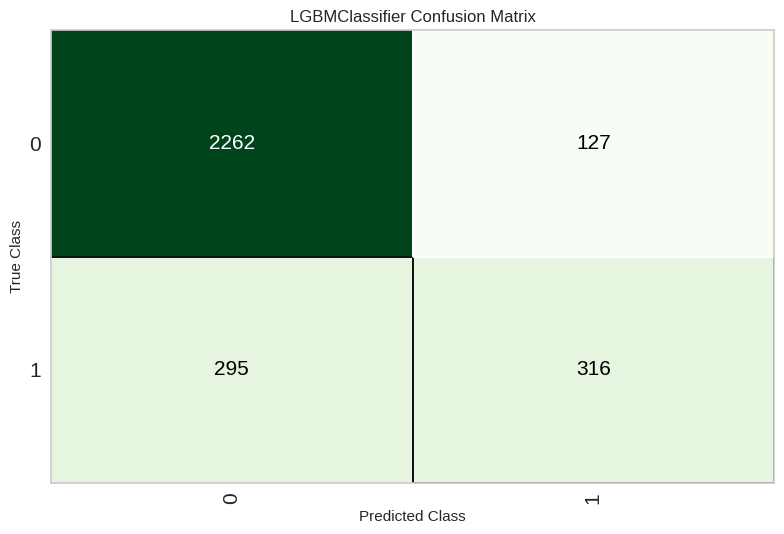

In [21]:
plot_model(tuned_lightgbm,'confusion_matrix')

O recall ainda pode ser melhorado. Para isso, usaremos o 'scale_pos_weight', que vai avaliar a razão entre negativos e positivos (80/20=4).

In [30]:
tuned_lightgbm = tune_model(lightgbm,
                            custom_grid = {
                                'learning_rate': [0.01, 0.1],
                                'n_estimators': [100, 200, 300],
                                'max_depth': [10, 20, 30],
                                'subsample': [0.6, 0.8, 1.0],
                                'colsample_bytree': [0.6, 0.8, 1.0],
                                'reg_alpha': [0.0, 0.1, 1.0],
                                'reg_lambda': [0.0, 0.1, 1.0],
                                'scale_pos_weight':[4]
                            },
                            optimize='Recall')

,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Gmean,Average precision score
Fold,,,,,,,,,
0,0.8515,0.7394,0.5276,0.6158,0.4967,0.5090,0.7855,0.7841,0.4430
1,0.8752,0.7535,0.5071,0.6062,0.4802,0.4970,0.7836,0.7830,0.4321
2,0.8678,0.7817,0.5139,0.6201,0.4970,0.5167,0.7968,0.7966,0.4460
3,0.8819,0.7606,0.5192,0.6171,0.4955,0.5115,0.7907,0.7901,0.4435
4,0.8673,0.7622,0.5070,0.6089,0.4818,0.4999,0.7860,0.7856,0.4350
5,0.8683,0.6923,0.5051,0.5841,0.4554,0.4653,0.7591,0.7561,0.4125
6,0.8297,0.6993,0.5102,0.5900,0.4632,0.4732,0.7635,0.7608,0.4182
7,0.8136,0.6993,0.4673,0.5602,0.4176,0.4329,0.7473,0.7458,0.3882
8,0.8134,0.6713,0.4507,0.5393,0.3903,0.4042,0.7306,0.7282,0.3697


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


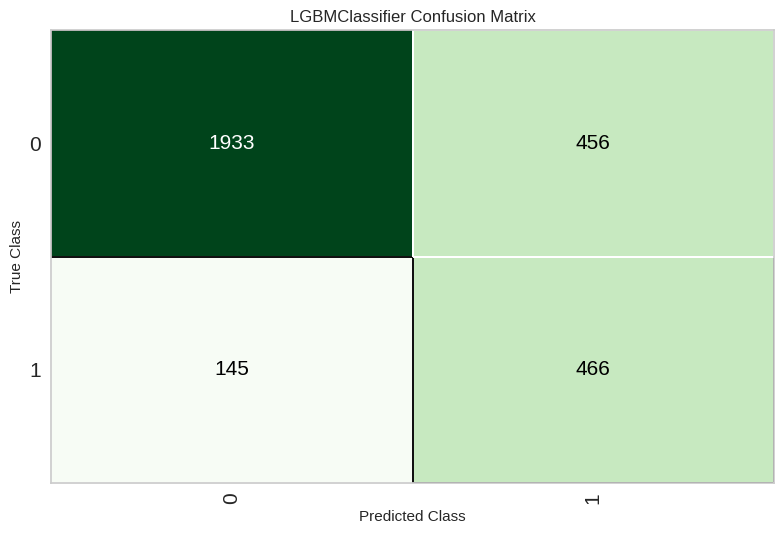

In [31]:
plot_model(tuned_lightgbm,'confusion_matrix')

O Recall subiu para 72%.

In [32]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Fazendo as predições

In [34]:
lightgbm_final = predict_model(tuned_lightgbm)

,Model,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Gmean,Average precision score
0,Light Gradient Boosting Machine,0.8685,0.7627,0.5054,0.6080,0.4808,0.4991,0.7859,0.7856,0.4338


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [35]:
save_model(lightgbm_final,'Final lightgbm Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('ordinal_encoding',
                  TransformerWrapper(exclude=None, include=['genero'],
                                     transformer=OrdinalEncoder(cols=['genero'],
                                                                drop_invariant=False,
                                                                handle_missing='return_nan',
                                                                handle_unknown='value',
                                                                mapping=[{'col': 'genero',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Feminino     0
 Masculino    1
 NaN         -1
 dtype: int64}],
                                                                return_df=True,
                                                                verbose=...
 3684   

Finalmente, fizemos as predições usando o modelo e salvamos o pipeline.